In [83]:
import numpy as np # mathemtaical computation
# numpy is aliased as np
import pandas as pd # data preprocessing
# pandas is aliased as pd
import matplotlib.pyplot as plt # visualization
# pyplot is aliased as plt
import seaborn as sns  # visualization
# seaborn is aliased as sns
import sklearn

In [84]:
import os
import warnings

In [85]:
df=pd.read_csv('CAR_DETAILS.csv')
df.head()

,name,Brand_name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,Maruti,2007,140000,125000,Petrol,Individual,Manual,First Owner


In [15]:
df.info()
#view the info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   Brand_name     4340 non-null   object
 2   year           4340 non-null   int64 
 3   selling_price  4340 non-null   int64 
 4   km_driven      4340 non-null   int64 
 5   fuel           4340 non-null   object
 6   seller_type    4340 non-null   object
 7   transmission   4340 non-null   object
 8   owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [16]:
df.shape#view the shape of the dataset

(4340, 9)

In [17]:
df.columns #check columns

Index(['name', 'Brand_name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [18]:
# Split the column name to get the model of the car
df["model"] = df.name.apply(lambda x : ' '.join(x.split(' ')[:1]))
df['model'].value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: model, dtype: int64

# Checking And Handling the null value and duplicates

In [19]:
df.isnull().sum()#ckeck the null value 

name             0
Brand_name       0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
model            0
dtype: int64

In [20]:
df.duplicated().sum()#check the duplicate  746

746

In [21]:
df.drop_duplicates(inplace=True) #drop  all duplicate

In [69]:
# View unique values from categorical features
categorical = [col for col in df.columns if df[col].dtypes == 'O']

for col in categorical:
  print(df[col].unique())

['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
['Maruti' 'Hyundai' 'Datsun' 'Chevrolet' 'Toyota' 'Honda' 'Tata' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']


In [70]:
# Summary of the data set
df.describe()

,year,selling_price,km_driven
count,3594.000000,3.594000e+03,3594.000000
mean,2012.966333,4.737619e+05,69222.927657
std,4.248636,5.087554e+05,47530.408343
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.500000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [22]:
df.dtypes #check the datatypes

name             object
Brand_name       object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
model            object
dtype: object

In [23]:
df.duplicated().sum()#recheck the duplicate not present  ( 00)

0

# Exploratory Data Analysis

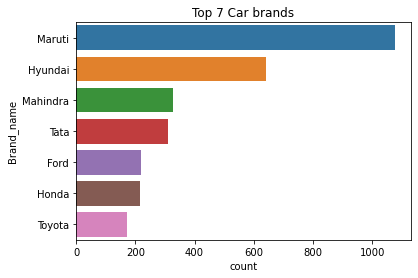

In [27]:
sns.countplot(y=df['Brand_name'],
              order=df['Brand_name'].value_counts().sort_values(ascending=False)[:7].index)
plt.title('Top 7 Car brands')
plt.show()

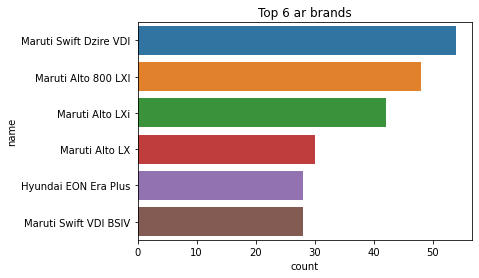

In [28]:
sns.countplot(y=df['name'],
              order=df['name'].value_counts().sort_values(ascending=False)[:6].index)
plt.title('Top 6 ar brands')
plt.show()

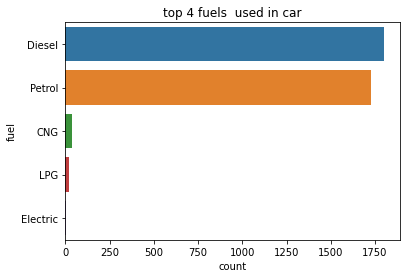

In [29]:
sns.countplot(y=df['fuel'],
              order=df['fuel'].value_counts().sort_values(ascending=False).index)
plt.title('top 4 fuels  used in car')
plt.show()

In [30]:
df.columns

Index(['name', 'Brand_name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'model'],
      dtype='object')

# Model Distribution

In [31]:
car = df.copy()

In [71]:
car["model"].value_counts().index

Index(['Maruti', 'Hyundai', 'Mahindra', 'Tata', 'Ford', 'Honda', 'Toyota',
       'Chevrolet', 'Renault', 'Volkswagen', 'Nissan', 'Skoda', 'Fiat', 'Audi',
       'Datsun', 'BMW', 'Mercedes-Benz', 'Jaguar', 'Mitsubishi', 'Land',
       'Volvo', 'Jeep', 'Ambassador', 'MG', 'OpelCorsa', 'Daewoo', 'Force',
       'Isuzu', 'Kia'],
      dtype='object')

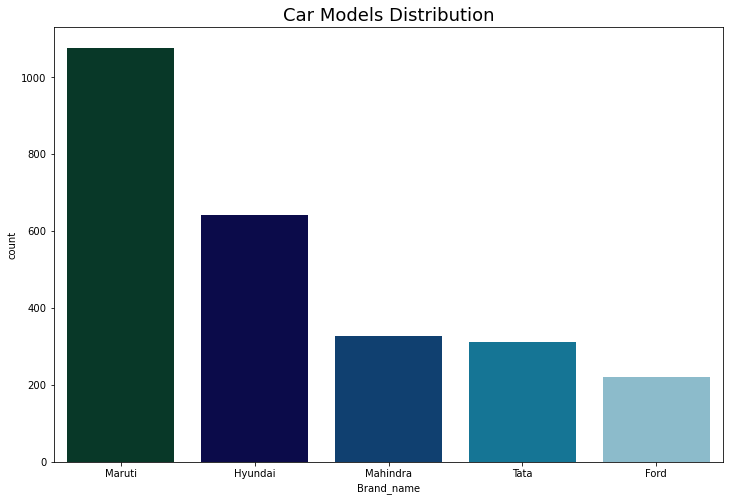

In [45]:
# Plot of Car Models Distribution
figure=plt.figure(figsize=(12,8))
plt.title('Car Models Distribution', fontsize=18)
plot = sns.countplot(x="Brand_name", data=car, order = car['Brand_name'].value_counts().index[:5], palette='ocean')
plt.show()


In the Car dataset, cars with the Maruti model are the most numerous models in the dataset after Hyundai and Mahindra. 

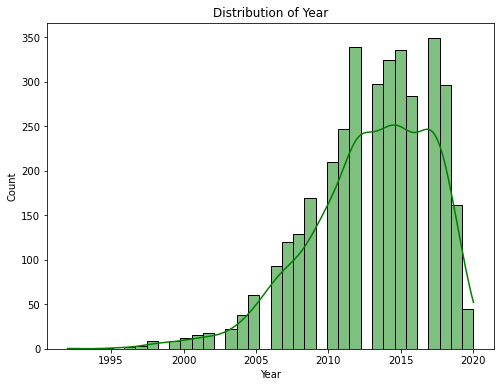

In [47]:
plt.figure(figsize=(8,6))
sns.histplot(data=car, x='year', kde=True, color='green')
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

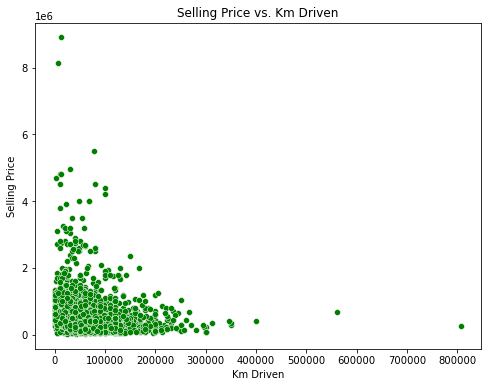

In [57]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=car, x='km_driven', y='selling_price', color='green')
plt.title('Selling Price vs. Km Driven')
plt.xlabel('Km Driven')
plt.ylabel('Selling Price')
plt.show()


We can observe from the scatter plot that there is a weak negative correlation between selling_price and km_driven, which means that as the km_driven increases, the selling_price tends to decrease. However, this relationship is not very strong and there is a lot of variability in the data.

# Summary for above bar plots:

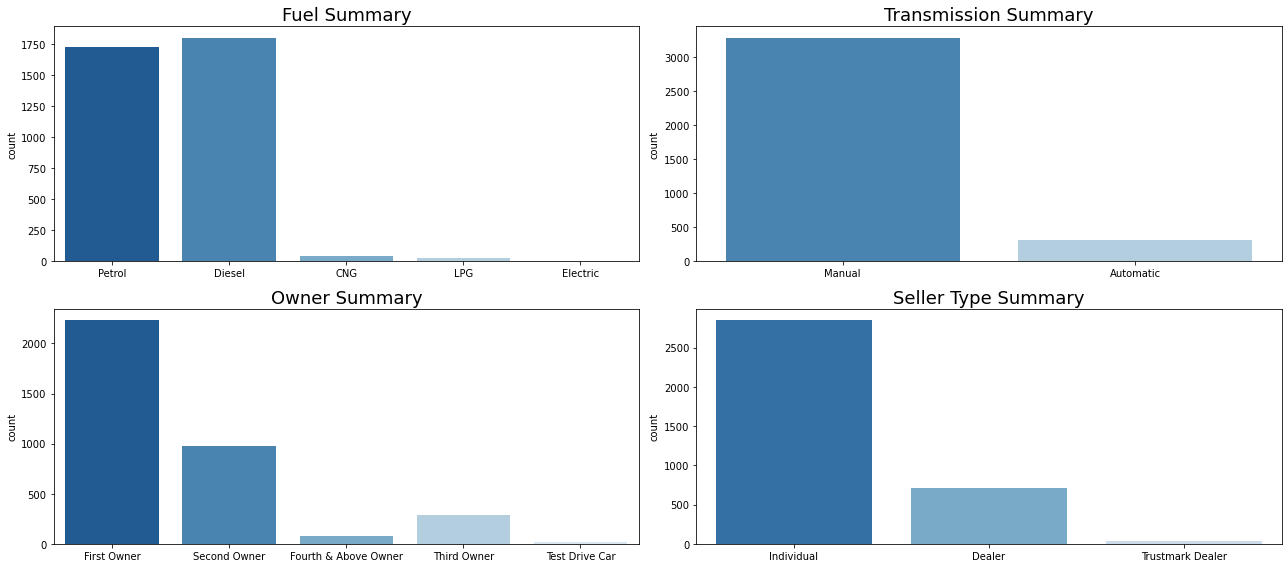

In [21]:
# Subplot of Categorical Summary
plt.figure(figsize=(18,8))

plt.subplot(2,2,1)
plt.title('Fuel Summary', fontsize=18)
sns.countplot(data=car, x='fuel', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,2)
plt.title('Transmission Summary', fontsize=18)
sns.countplot(data=car, x='transmission', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,3)
plt.title('Owner Summary', fontsize=18)
sns.countplot(data=car, x='owner', palette='Blues_r')
plt.xlabel('')
plt.subplot(2,2,4)
plt.title('Seller Type Summary', fontsize=18)
sns.countplot(data=car, x='seller_type', palette='Blues_r')
plt.xlabel('')

plt.tight_layout()
plt.show()

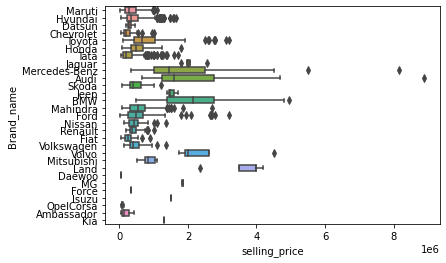

In [22]:
sns.boxplot(y=df['Brand_name'],x=df['selling_price'])
plt.show()

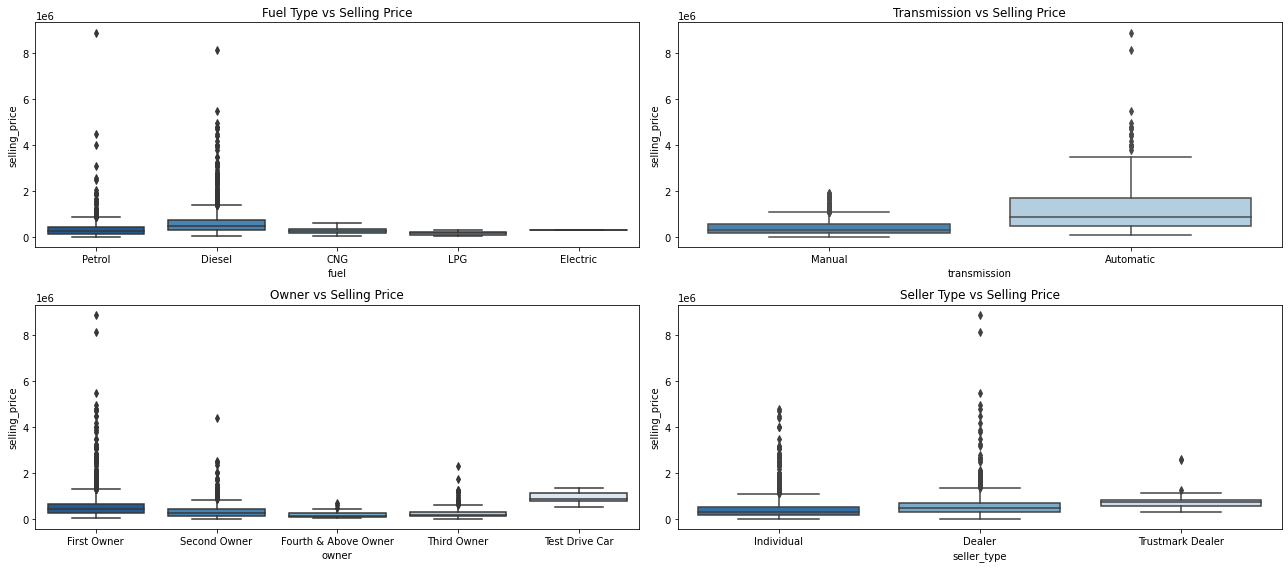

In [59]:
plt.figure(figsize=(18, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='fuel', y='selling_price', data=car, palette='Blues_r')
plt.title('Fuel Type vs Selling Price')

plt.subplot(2, 2, 2)
sns.boxplot(x='transmission', y='selling_price', data=car, palette='Blues_r')
plt.title('Transmission vs Selling Price')

plt.subplot(2, 2, 3)
sns.boxplot(x='owner', y='selling_price', data=car, palette='Blues_r')
plt.title('Owner vs Selling Price')

plt.subplot(2, 2, 4)
sns.boxplot(x='seller_type', y='selling_price', data=car, palette='Blues_r')
plt.title('Seller Type vs Selling Price')

plt.tight_layout()
plt.show()

The box plot summarizes the distribution of selling_price across different categories. The box represents the interquartile range (IQR), which contains the middle 50% of the data. The line inside the box represents the median, and the whiskers represent the range of the data (excluding outliers).

From the box plots, we can see that there are some differences in selling price between different categories. For example, cars with diesel fuel type tend to have a higher selling price than those with petrol or CNG fuel type. Similarly, cars with manual transmission tend to have a lower selling price than those with automatic transmission. Cars with fewer owners also tend to have a higher selling price than those with more owners. Finally, cars sold by individuals tend to have a lower selling price than those sold by dealerships.

# Factors Affecting Selling Price :

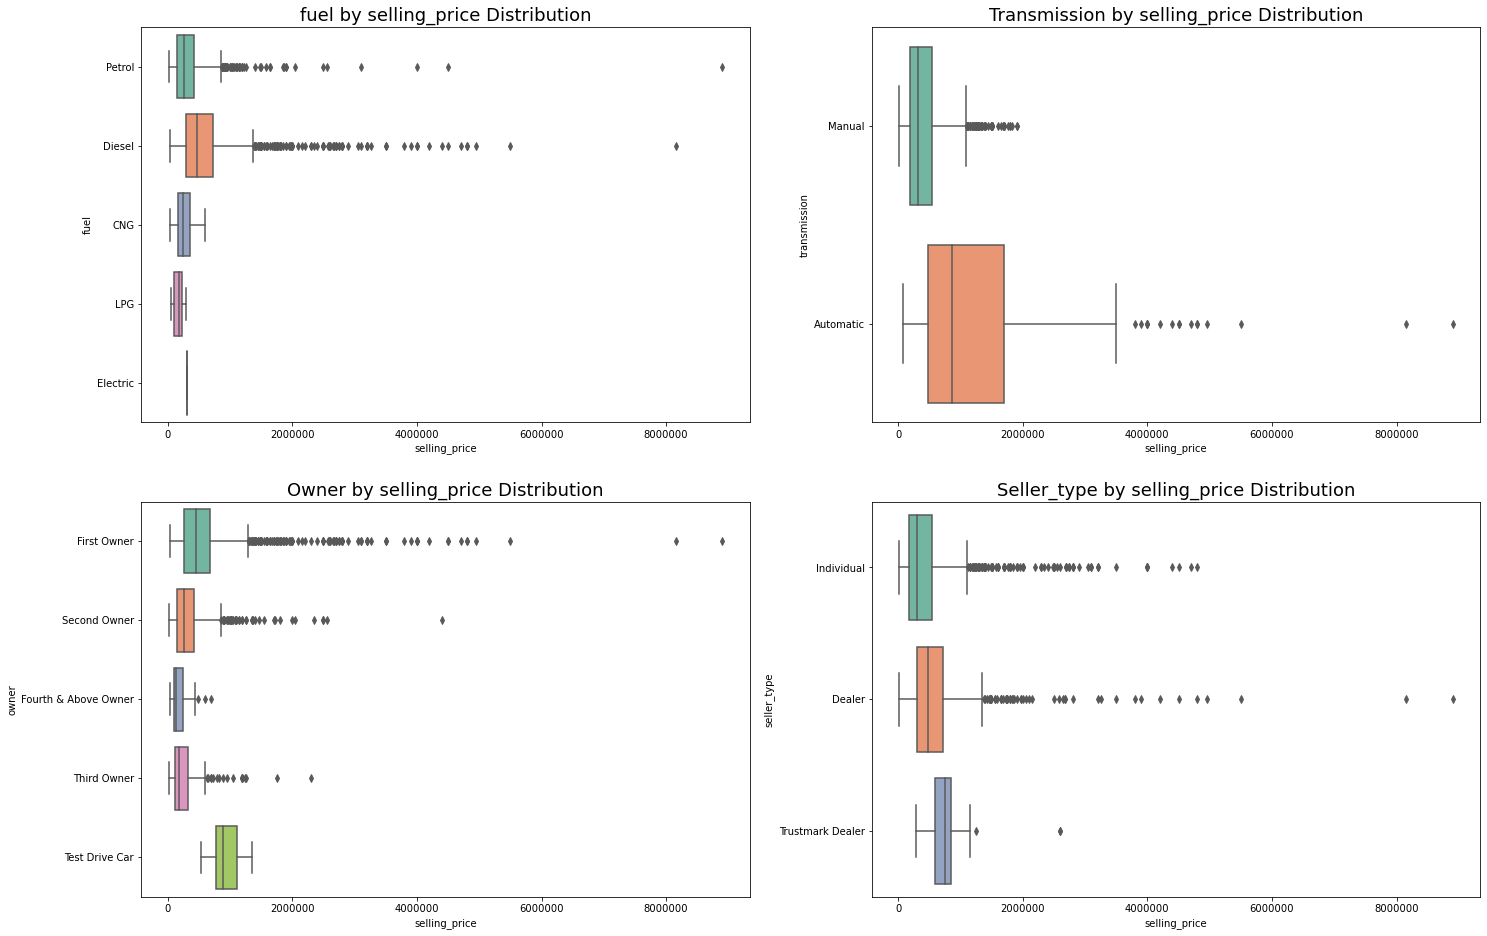

In [24]:
plt.figure(figsize=(24,16))

plt.subplot(2,2,1)
plt.title('fuel by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='fuel', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,2)
plt.title('Transmission by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='transmission', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,3)
plt.title('Owner by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='owner', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,4)
plt.title('Seller_type by selling_price Distribution', fontsize=18)
sns.boxplot(data=car, x='selling_price', y='seller_type', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')

Findings:

In this Car dataset, Cars with the Diesel Fuel type have more influence on Selling Prices.
The Transmission Automatic type which has more influence on Selling prices than Manual.
First Owner also has a high influence on Selling Prices.
Seller Type Dealer also has a high influence on Selling Price.

In [25]:
df.columns

Index(['name', 'Brand_name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

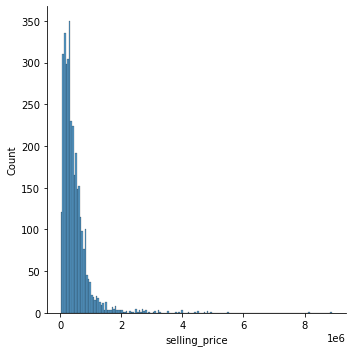

In [26]:
sns.displot(df['selling_price'])# using displot for checking selling price
plt.show()

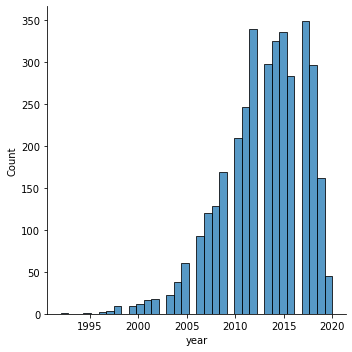

<Figure size 576x432 with 0 Axes>

In [58]:
sns.displot(df['year'])
plt.figure(figsize=(8,6))
plt.show()

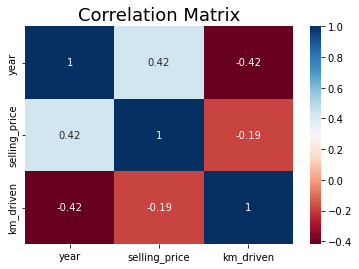

<Figure size 576x432 with 0 Axes>

In [63]:
corr =  df.corr()
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.title('Correlation Matrix', fontsize=18)
plt.show()

From the correlation matrix, we can see that there is a positive correlation between "year" and "selling_price", which indicates that newer cars tend to have higher selling prices. There is also a negative correlation between "km_driven" and "selling_price", which indicates that cars with higher km_driven tend to have lower selling prices. Additionally, we can see that there is a weak negative correlation between "year" and "km_driven", which suggests that newer cars tend to have lower mileage

<AxesSubplot:title={'center':'year by km_driven Distribution'}, xlabel='year', ylabel='km_driven'>

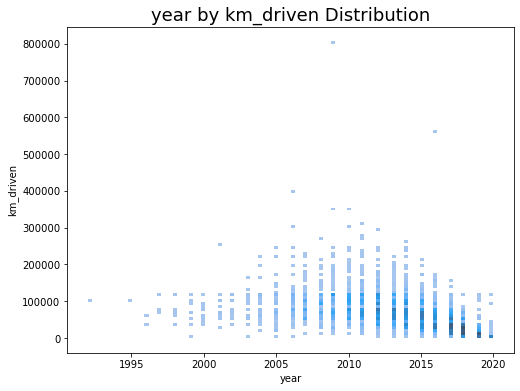

In [64]:
plt.figure(figsize=(8,6))
plt.title('year by km_driven Distribution', fontsize=18)
sns.histplot(data=car, x='year', y='km_driven', bins=100)
#plt.ticklabel_format(style='plain', axis='x')

# Finding the cars which are sold at Max. or Min. price

In [65]:
pd.pivot_table(data=car, index=['name'], values=['selling_price','km_driven','year']).sort_values(by='selling_price', 
                                                                                                  ascending=False)

,km_driven,selling_price,year
name,,,
Audi RS7 2015-2019 Sportback Performance,13000.0,8900000.0,2016.0
Mercedes-Benz S-Class S 350d Connoisseurs Edition,6500.0,8150000.0,2017.0
Mercedes-Benz GLS 2016-2020 350d 4MATIC,77350.0,5500000.0,2016.0
BMW X5 xDrive 30d xLine,30000.0,4950000.0,2019.0
Audi A5 Sportback,1500.0,4700000.0,2020.0
...,...,...,...
Maruti 800 EX,45000.0,35000.0,2002.5
OpelCorsa 1.4 GL,100000.0,35000.0,2002.0
Tata Nano Std BSII,50000.0,35000.0,2009.0


In [66]:
pd.pivot_table(data=car, index=['name'], values=['selling_price','km_driven','year']).sort_values(by='km_driven', 
                                                                                                  ascending=False)

,km_driven,selling_price,year
name,,,
Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII,350000.0,280000.0,2010.0
Maruti SX4 S Cross DDiS 320 Delta,320000.0,495000.0,2015.5
Volkswagen Jetta 2.0 TDI Comfortline,312000.0,350000.0,2011.0
Mahindra Xylo E9,295000.0,300000.0,2012.0
Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,281500.0,550000.0,2008.0
...,...,...,...
Renault KWID Climber 1.0 MT Opt BSIV,1000.0,541000.0,2020.0
Honda Amaze S Petrol BSIV,1000.0,614000.0,2020.0
Ford Ecosport Sports Petrol,1000.0,1100000.0,2020.0


In [67]:
pd.pivot_table(data=car, index=['name'], values=['selling_price','km_driven','year']).sort_values(by='year', ascending=False)


,km_driven,selling_price,year
name,,,
Mahindra XUV500 W11 Option AWD,25000.0,1400000.0,2020.0
Honda Amaze S Petrol BSIV,1000.0,614000.0,2020.0
Maruti Alto K10 LXI CNG,40000.0,282000.0,2020.0
Ford Ecosport Sports Petrol,1000.0,1100000.0,2020.0
Ford Ecosport Thunder Edition Diesel,1010.0,1331000.0,2020.0
...,...,...,...
Maruti Omni 5 Str STD,60000.0,65000.0,1998.0
Maruti Omni 5 Str STD LPG,35000.0,50000.0,1998.0
Maruti Esteem AX,70000.0,79000.0,1997.0


# CONCLUSION :

# data processing

In [29]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,97%,98%,99%,max
year,3594.0,2012.966333,4.248636,1992.0,2000.00,2003.0,2004.0,2005.0,2013.5,2019.0,2019.0,2020.0,2020.0
selling_price,3594.0,473761.870618,508755.391845,20000.0,51937.77,60000.0,70000.0,80000.0,350000.0,1500000.0,1800000.0,2675000.0,8900000.0
km_driven,3594.0,69222.927657,47530.408343,1.0,1753.94,5000.0,6571.1,10000.0,60000.0,170000.0,192420.0,223046.2,806599.0


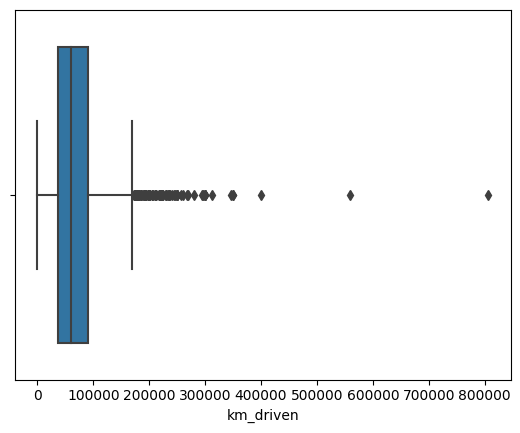

In [62]:
sns.boxplot(x=df['km_driven'])
plt.show()

In [33]:
print(df[df['km_driven']>50000].shape)

(2154, 9)


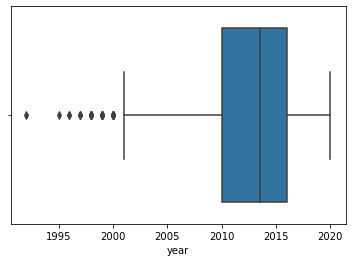

In [29]:
sns.boxplot(x=df['year'])
plt.show()

In [30]:
print(df[df['year']>2000].shape)

(3557, 9)


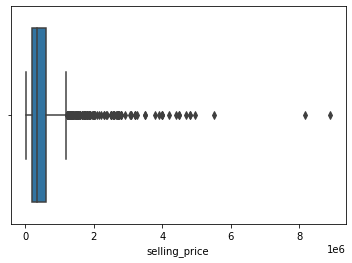

In [31]:
sns.boxplot(x=df['selling_price'])
plt.show()

In [32]:
print(df[df['selling_price']>50000].shape)

(3559, 9)


In [33]:
#sns.boxplot(x=df['year'])
#plt.show()

In [35]:
df.head()

,name,Brand_name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,Maruti,2007,140000,125000,Petrol,Individual,Manual,First Owner


In [112]:
#df['name'].nunique()

In [ ]:
df.drop('name',axis=1,inplace=True)
df.columns

In [ ]:
x = df.drop('selling_price',axis=1)
y = df['selling_price']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

# Split the data into train and test

In [ ]:
# Spliting training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=227)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

# Create function to cpmute MSE, RMSE, MAE,Trai and Test Test Score

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2s)

# Import ML model building libraries

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Major Import
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [106]:
x_train.dtypes

Brand_name      object
year             int64
km_driven        int64
fuel            object
seller_type     object
transmission    object
owner           object
dtype: object

# Columns index that needs to undergo OneHotEncoding - [0,2,3,4,5]

#1) LinearRegression

In [107]:
step1 = ColumnTransformer(transformers=[('ohe',OneHotEncoder(handle_unknown = 'ignore',categories='auto',
                                                             sparse_output=False),[0,3,4,5,6])],remainder='passthrough')

step2 = LinearRegression()
pipe_lr = Pipeline([('step1',step1),('step2',step2)])
pipe_lr.fit(x_train,y_train)
ypred_lr = pipe_lr.predict(x_test)
eval_model(y_test,ypred_lr)

MAE 176448.12144927276
MSE 87302377380.90312
RMSE 295469.7571341323
R2 Score 0.7631850355316975


In [108]:
scores=[]
for i in range(200):
    x_train,x_test, y_train,y_test=train_test_split(x,y,test_size = 0.2, random_state=i)
    stap2 = LinearRegression()
    pipe_lr = Pipeline([('step1',step1),('step2',step2)])
    pipe_lr.fit(x_train, y_train)
    y_pred=pipe_lr.predict(x_test)
    scores.append(r2_score(y_test,y_pred))
    print(r2_score(y_test,y_pred), i)

-364592279879.3239 0
0.746701773307624 1
0.6990548379456298 2
0.6508489695127679 3
-10668994334651.03 4
-7157633084453.783 5
0.7256263251750175 6
0.7042009408278064 7
-3027885844929.136 8
-2331405449052.9946 9
-20830022562694.645 10
-458165659251.8759 11
-8368603005.568767 12
-1680119384532.2852 13
-2987414382901.264 14
0.7059536256134191 15
-7118720480433.158 16
-274185141442.13257 17
-1203753290268.5833 18
0.6732677056409488 19
0.6757677041471434 20
-15277884191.55782 21
-6719865216126.586 22
0.666154973653266 23
-14245688278704.8 24
0.7560281107407141 25
-1674550256102.74 26
-40324296323.28431 27
0.6542901780151913 28
0.6515117413384081 29
-336049836841.2593 30
-127778394668.60887 31
-1347539511646.1511 32
-185538849066.70224 33
0.659504799689052 34
-14357160210472.342 35
-1616560003514.8276 36
0.6810791268499927 37
-244656532371.0003 38
-3145770865175.8174 39
0.688117663709316 40
-1694774655407.0576 41
-9261790262368.805 42
-338738404920.10095 43
0.7319667957373339 44
-208056634459

In [109]:
scores[np.argmax(scores)]

0.7631850355316975

In [ ]:
#2) Ridge Regression 

In [98]:
step1 = ColumnTransformer(transformers=[('ohe',OneHotEncoder(handle_unknown = 'ignore',categories='auto',
                                                             sparse_output=False),[0,3,4,5,6])],remainder='passthrough')
step2 = Ridge(alpha=2.41)
pipe_rid = Pipeline([('step1',step1),('step2',step2)])
pipe_rid.fit(x_train,y_train)
ypred_rid = pipe_rid.predict(x_test)
eval_model(y_test,ypred_rid)

MAE 184109.50823487603
MSE 123050279071.4326
RMSE 350785.23211707844
R2 Score 0.6565662640862407


In [ ]:
#3) lasso Regression

In [99]:
step1 = ColumnTransformer(transformers=[('ohe',OneHotEncoder(handle_unknown = 'ignore',categories='auto',
                                                             sparse_output=False),[0,3,4,5,6])],remainder='passthrough')
step2 = Lasso(alpha=0.234)
pipe_las = Pipeline([('step1',step1),('step2',step2)])
pipe_las.fit(x_train,y_train)
ypred_las = pipe_las.predict(x_test)
eval_model(y_test,ypred_las)

MAE 182399.2581409115
MSE 123715452466.71156
RMSE 351732.07483354653
R2 Score 0.6547097629397584


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.127e+13, tolerance: 1.141e+11
  model = cd_fast.enet_coordinate_descent(


In [ ]:
#4)  RandomForestRegression

In [100]:
step1 = ColumnTransformer(transformers=[('ohe',OneHotEncoder(handle_unknown = 'ignore',categories='auto',
                                                             sparse_output=False),[0,3,4,5,6])],remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,max_depth=8,min_samples_split=11,random_state=5)
pipe_rf = Pipeline([('step1',step1),('step2',step2)])
pipe_rf.fit(x_train,y_train)
ypred_rf = pipe_rf.predict(x_test)
eval_model(y_test,ypred_rf)

MAE 143328.7480174286
MSE 76045920391.97041
RMSE 275764.2478494455
R2 Score 0.7877555846415143


In [ ]:
#5)DecisionTreeRegression

In [101]:
step1 = ColumnTransformer(transformers=[('ohe',OneHotEncoder(handle_unknown = 'ignore',categories='auto',
                                                             sparse_output=False),[0,3,4,5,6])],remainder='passthrough')
step2 = DecisionTreeRegressor(max_depth=8,min_samples_split=11,random_state=5)
pipe_dt = Pipeline([('step1',step1),('step2',step2)])
pipe_dt.fit(x_train,y_train)
ypred_dt = pipe_dt.predict(x_test)
eval_model(y_test,ypred_dt)

MAE 154973.41388775114
MSE 96304411008.33916
RMSE 310329.52004013275
R2 Score 0.7312140703202469


# Random Forrest model is best performing model in terms of RMSE value

In [69]:
print(type(x_test))

<class 'pandas.core.frame.DataFrame'>


In [70]:
import pickle

In [71]:
# Save object to a pickle file
with open("pipeline_lr.pkl", "wb") as file:
    pickle.dump(pipe_lr, file)

# Load object from pickle file
with open("pipeline_lr.pkl", "rb") as file:
    loaded_object = pickle.load(file)


In [72]:
print(type(loaded_object))

<class 'sklearn.pipeline.Pipeline'>


In [73]:
pickle.dump(df,open('car_details_data.pkl','wb'))

In [74]:
# Save the pipeline object to a file
with open('pipeline_lr.pkl', 'wb') as f:
    pickle.dump(pipe_lr, f)

In [75]:
loaded_model = pickle.load(open('pipeline_lr.pkl','rb'))

In [76]:
# Load the saved pipeline object from the file
with open('pipeline_lr.pkl', 'rb') as f:
    loaded_pipeline = pickle.load(f)

In [77]:
new_df = x.sample(20)
new_df

,Brand_name,year,km_driven,fuel,seller_type,transmission,owner
1154,Hyundai,2015,32000,Petrol,Dealer,Manual,First Owner
3619,Tata,2017,25000,Petrol,Individual,Manual,First Owner
3071,Maruti,2009,190000,Diesel,Individual,Manual,Third Owner
2092,Maruti,2016,30000,CNG,Individual,Manual,Second Owner
4288,Maruti,2008,120000,Petrol,Individual,Manual,Third Owner
2987,Hyundai,2004,58000,Petrol,Individual,Manual,First Owner
685,Maruti,2013,38000,Petrol,Individual,Manual,First Owner
3433,Ford,2014,100000,Diesel,Individual,Manual,Second Owner
152,Hyundai,2008,53772,Petrol,Individual,Manual,First Owner
3249,Honda,2016,90000,Diesel,Individual,Manual,First Owner


In [78]:
print(type(loaded_pipeline))

<class 'sklearn.pipeline.Pipeline'>


In [79]:
predict_price = loaded_pipeline.predict(new_df)

In [80]:
new_df['predict_price']= predict_price
new_df.head(20)

,Brand_name,year,km_driven,fuel,seller_type,transmission,owner,predict_price
1154,Hyundai,2015,32000,Petrol,Dealer,Manual,First Owner,456108.701172
3619,Tata,2017,25000,Petrol,Individual,Manual,First Owner,404248.425781
3071,Maruti,2009,190000,Diesel,Individual,Manual,Third Owner,129852.560547
2092,Maruti,2016,30000,CNG,Individual,Manual,Second Owner,389854.460938
4288,Maruti,2008,120000,Petrol,Individual,Manual,Third Owner,-5274.982422
2987,Hyundai,2004,58000,Petrol,Individual,Manual,First Owner,14940.375000
685,Maruti,2013,38000,Petrol,Individual,Manual,First Owner,330082.759766
3433,Ford,2014,100000,Diesel,Individual,Manual,Second Owner,517253.572266
152,Hyundai,2008,53772,Petrol,Individual,Manual,First Owner,163745.431641
3249,Honda,2016,90000,Diesel,Individual,Manual,First Owner,655792.859375
